In [5]:
#! /Users/sspalding/tensorflow/bin/python
# Basic Linear Regression implemented using numpy
# and Goggle's TensorFlow library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import sys

In [6]:
## Solve using numpy
def computeCost(X, y, theta):
    """ J = (1/2/m)*(X*theta-y)'*(X*theta-y) """
    m = len(y)
    A = X.dot(theta) - y
    return float(.5/m * A.T.dot(A))

def gradientDescent(X, y, theta, alpha, iterations):
    """ theta = theta - alpha/m * X' * (X*theta - y) """
    m = len(y)
    for i in xrange(iterations):
        theta = theta - alpha/m * X.T.dot(X.dot(theta) - y)
    return theta

In [7]:
## Solve using TensorFlow
def TFcomputeCost(X, y, theta):
    """ J = (1/2/m)*(X*theta-y)'*(X*theta-y) """
    m = len(y)
    X,y,theta = [tf.constant(e) for e in [X,y,theta]]

    A = tf.sub(tf.matmul(X, theta), y)
    B = tf.matmul(tf.transpose(A),A)
    with tf.Session() as sess:
        result = sess.run(B)
    return float(.5/m * result)

def TFgradientDescent(X, y, theta, alpha, iterations):
    """ theta = theta - alpha/m * X' * (X*theta - y) """
    m = len(y)
    X,y,alpha,m = [tf.constant(e, dtype=tf.float64)
                       for e in [X,y,alpha,m]]
    theta = tf.Variable(theta)
    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    for i in xrange(iterations):
        delta = tf.mul(tf.div(alpha,m),
                            tf.matmul(
                                tf.transpose(X),
                                tf.sub(tf.matmul(X,theta), y)))
        theta_ = tf.sub(theta, delta)
        theta = sess.run(theta_)
    sess.close()
    return theta

Initial theta:  0.000000 0.000000
Initial Cost:  32.0727338775
TensorFlow Initial Cost:  32.0727338775
Theta found by gradient descent:  -3.630291 1.166362
Theta found by TensorFlow gradient descent:  0.000000 0.000000
X= 1700, y= 1979.18570413


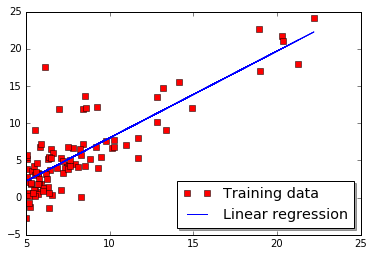

In [8]:
# Load data from file
X,y = np.loadtxt('ex1data1.txt',dtype='float',delimiter=',').T
m = len(y)

# Plot Training Data
plt.plot(X,y, 'rs', label='Training data')

# Add a column of ones to X
X = np.array((np.ones(m),X)).T
# Convert y from vector -> matrix
y.shape = (m,1)
# Initialize fitting parameters
theta = np.zeros((2,1))
TFtheta = np.zeros((2,1))
# Some gradient descent settings
iterations = 1500
alpha = 0.01

# Compute and display initial cost
print "Initial theta: ",
print '%f %f'%(theta[0], theta[1])
print "Initial Cost: ", computeCost(X, y, theta)
print "TensorFlow Initial Cost: ", TFcomputeCost(X, y, TFtheta)

# Run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)
# TFtheta = TFgradientDescent(X, y, TFtheta, alpha, iterations)

# Print theta to screen
print 'Theta found by gradient descent: ',
print '%f %f'%(theta[0], theta[1])
print 'Theta found by TensorFlow gradient descent: ',
print '%f %f'%(TFtheta[0], TFtheta[1])

# Plot the linear fit
plt.plot(X[:,1], X.dot(theta),'-',label='Linear regression')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
print "X= 1700, y=",np.array([1, 1700]).dot(theta)[0]

plt.show()